In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/tarasbohdan/Desktop/Experiments-AAAI-24


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'exp_mult_repair_levels'
DATASET_NAME = 'StudentPerformance'
EXPERIMENT_SESSION_UUID = 'cb064e43-bf31-456f-ac04-e1e653a3e182'
SENSITIVE_ATTRS = ['sex']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(285, 21)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_2'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:07:44.259,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=50, Az=10, Ay=10",0.966387,0.982143,1.000000,0.000000,0.952381,1.000000,0.000000,0
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:11:33.148,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=10, Az=50, Ay=10",0.983193,0.982143,1.000000,0.000000,0.984127,1.000000,0.000000,0
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:15:10.420,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=50, Az=50, Ay=10",0.991597,0.982143,1.000000,0.000000,1.000000,1.000000,NaN,0
15,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:07:44.259,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=50, Az=10, Ay=10",0.117425,0.085735,0.077491,0.539178,0.145593,0.111969,0.818086,0
16,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:11:33.148,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=10, Az=50, Ay=10",0.114460,0.106223,0.091425,0.920100,0.121783,0.108660,0.935426,0
17,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:15:10.420,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=50, Az=50, Ay=10",0.113739,0.071570,0.057712,0.833745,0.151222,0.151222,NaN,0
30,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:07:44.259,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=50, Az=10, Ay=10",0.979167,0.989691,1.000000,0.000000,0.968421,1.000000,0.000000,0
31,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:11:33.148,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=10, Az=50, Ay=10",0.989583,0.989691,1.000000,0.000000,0.989474,1.000000,0.000000,0
32,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:15:10.420,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=50, Az=50, Ay=10",0.994924,0.990291,1.000000,0.000000,1.000000,1.000000,NaN,0
45,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",StudentPerformance,200,OK,2023-11-13 15:07:44.259,cb064e43-bf31-456f-ac04-e1e653a3e182,Exp_iter_2,200,...,"['Ax=50, Az=10, Ay=10', 'Ax=10, Az=50, Ay=10',...","Ax=50, Az=10, Ay=10",0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'RandomForestClassifier': 'RF',
    }
}

<Figure size 1200x600 with 0 Axes>

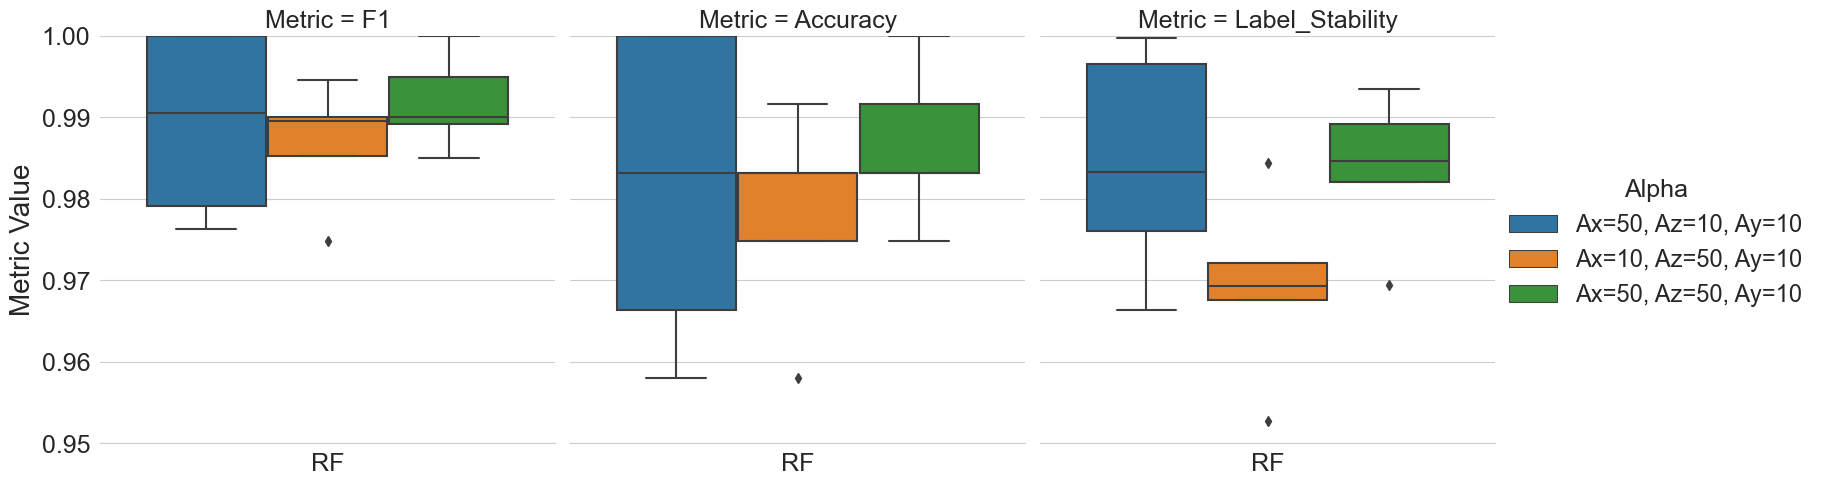

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.95, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

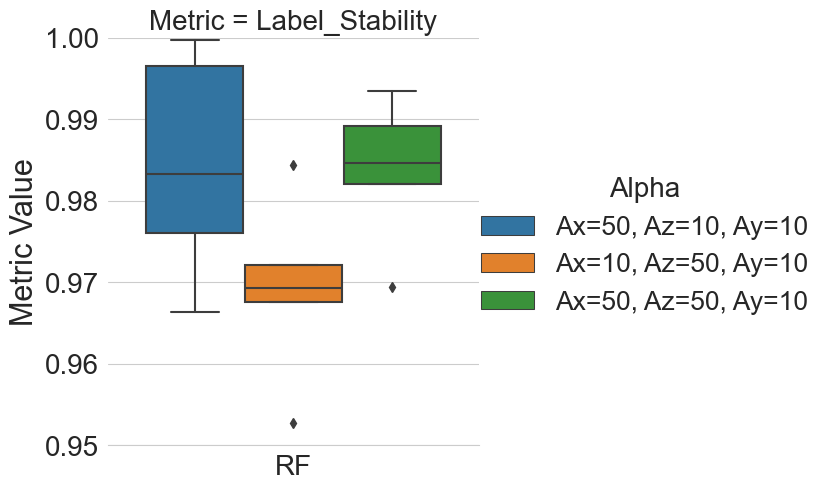

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.95, 1.00),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

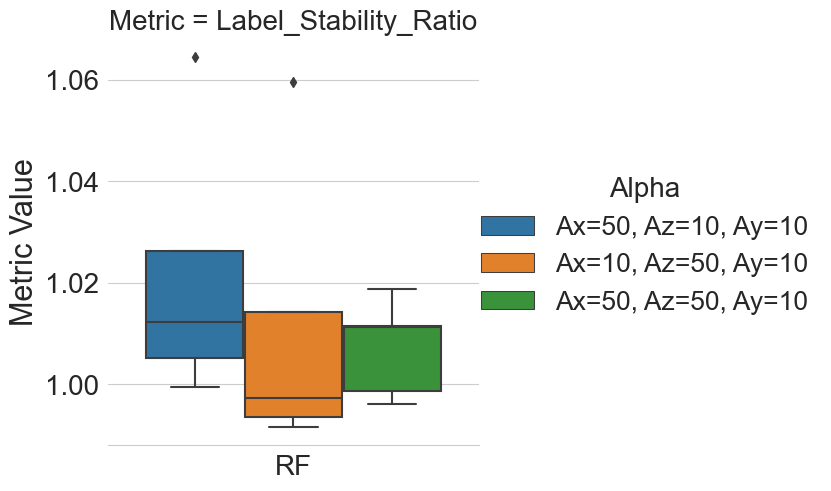

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

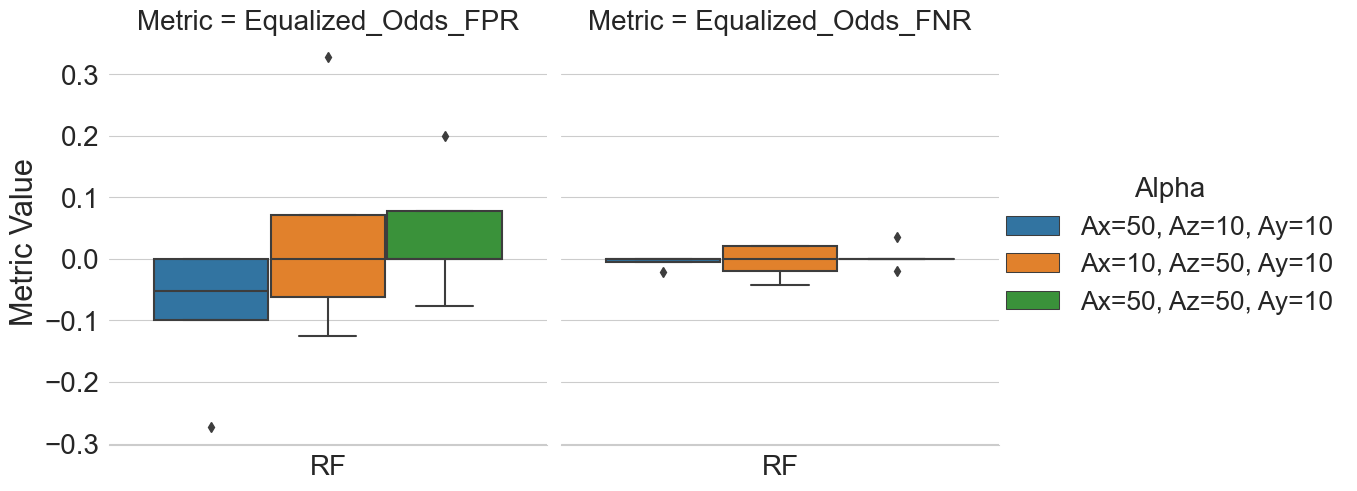

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

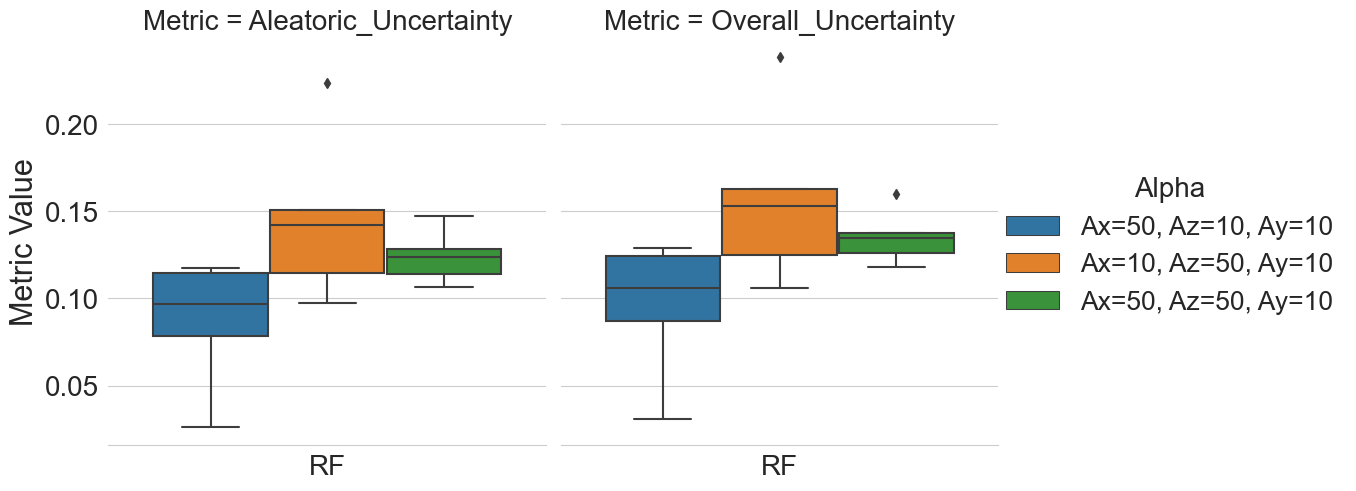

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.90, 1.00),
                                           metric_names=['Aleatoric_Uncertainty', 'Overall_Uncertainty'],
                                           vals_to_replace=vals_to_replace)